In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def loss(X: np.ndarray,Y: np.ndarray,theta: np.ndarray):
    sigmoidVal = (1/(1 + np.exp(-np.matmul(X,theta))))
    return (np.sum(np.matmul(Y.T,np.log(sigmoidVal)) + np.matmul(1-Y.T,np.log(1-sigmoidVal))))

def gradient(X: np.ndarray,Y: np.ndarray,theta: np.ndarray):  
    return np.matmul(X.T,Y - (1/(1 + np.exp(-np.matmul(X,theta)))))

def hessian_inv(X: np.ndarray,theta: np.ndarray):
    midMat = np.exp(-np.matmul(X,theta))
    return np.linalg.inv(-np.matmul(np.matmul(X.T,np.diag((midMat/np.square(1+midMat)).reshape(midMat.shape[0]))),X))

def newton(X,Y,thresh = 1e-20):
    theta = np.zeros(X.shape[1]+1).reshape(X.shape[1]+1,1)
    Y = Y.reshape(Y.shape[0],1)
    X = np.concatenate([np.ones(X.shape[0]).reshape(X.shape[0],1), X], axis = 1)
    currLoss = 1; prevLoss = 0
    print(f'Shape of X : {X.shape}\nShape of Y(ou) : {Y.shape}\nShape of theta : {theta.shape}')
    metrics = {'thetas':[],'losses':[],'iters' : 0}
    while abs(currLoss - prevLoss) > thresh :
        theta = theta - np.matmul(hessian_inv(X,theta),gradient(X,Y,theta))
        prevLoss = currLoss
        currLoss = loss(X,Y,theta)
        metrics['thetas'].append(theta.reshape(theta.shape[0]))
        metrics['losses'].append(currLoss)
        metrics['iters'] += 1
    print(theta.shape)
    return theta,metrics

In [3]:
def loadData(path):
    return np.genfromtxt(path,delimiter=',')

def normalize(data):
    return (data-np.mean(data,axis = 0))/np.std(data,axis = 0)

In [6]:
trainX = normalize(loadData('/Users/anamikaseth/Desktop/Academics/Sem2301/COL774/Assignments/Ass1/data/q3/logisticX.csv'))
trainY = loadData('/Users/anamikaseth/Desktop/Academics/Sem2301/COL774/Assignments/Ass1/data/q3/logisticY.csv')
theta, metrics = newton(trainX,trainY)

Shape of X : (100, 3)
Shape of Y(ou) : (100, 1)
Shape of theta : (3, 1)
(3, 1)


In [13]:
tY = pd.read_csv('/Users/anamikaseth/Desktop/Academics/Sem2301/COL774/Assignments/Ass1/data/q3/logisticY.csv')

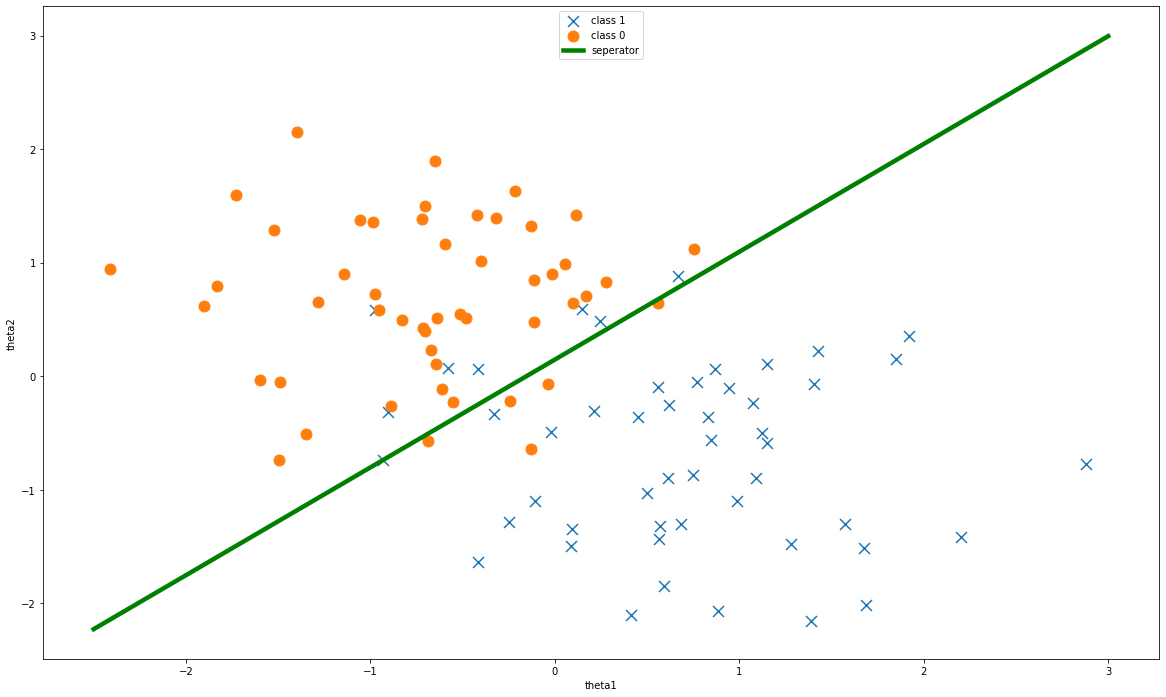

In [141]:
plotData = np.concatenate([trainY.reshape(trainY.shape[0],1),trainX],axis = 1)
plt.figure(figsize=(20,12))
plt.scatter(plotData[plotData[:,0] == 1][:,1],plotData[plotData[:,0] == 1][:,2],marker='x',s = 120, label = 'class 1')
plt.scatter(plotData[plotData[:,0] == 0][:,1],plotData[plotData[:,0] == 0][:,2], s = 120, label = 'class 0')
plt.xlabel('theta1')
plt.ylabel('theta2')
theta0 = theta[0][0]; theta1 = theta[1][0]; theta2 = theta[2][0]
# Along X : theta1, along Y : theta2
valsX = np.linspace(-2.5,3,2)
def f(x) :
    return (-theta0/theta2) + (-theta1*x/theta2)
valsY = f(valsX)
plt.plot(valsX,valsY, linewidth = 4.5, c = 'green',label = 'seperator')
plt.legend(loc = 'upper center')
plt.savefig('Q3plot.png')